<a href="https://colab.research.google.com/github/opsifiz/AIB5_Mental-Health-Sentiment-Analysis/blob/main/data/clean_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
!pip install contractions
!pip install kagglehub
!pip install datasets

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tqdm
import kagglehub
import re
import html
import contractions
import matplotlib.pyplot as plt
import datasets
import json
import os

In [ ]:
df1 = pd.read_csv('data/Sentiment_Analysis_for_Mental_Health.csv', index_col=0)

In [ ]:
df1.isnull().sum()

,0
statement,362
status,0


In [ ]:
df1 = df1.rename(columns={'statement': 'text'})

In [ ]:
df1['status'] = df1['status'].replace('Depression', 'depression')
df1['status'] = df1['status'].replace('Bipolar', 'bipolar')

In [ ]:
df2_data = datasets.load_dataset("Kanakmi/mental-disorders")
df2 = pd.DataFrame(df2_data['train'])

In [4]:
df2

,text,label
0,My father - all of my life - has shifted betwe...,0
1,I have health anxiety where I go to the doctor...,3
2,I was thinking about the differences between B...,0
3,Let me preface this by saying that I promise I...,2
4,"I've been exploring this forum for awhile, and...",0
...,...,...
465046,Around halloween i started getting distant fro...,0
465047,I coundn't sleep since I accidentally spilled ...,3
465048,IDK if this is a bpd symptom but I really have...,0
465049,I have prolonged this enough. I am losing my p...,0


In [ ]:
df2.columns

Index(['text', 'label'], dtype='object')

In [ ]:
df2.isnull().sum()

,0
text,0
label,0


In [ ]:
df2 = df2.rename(columns={'label': 'status'})

In [ ]:
label_mapping = {
    0: 'BPD',
    1: 'bipolar',
    2: 'depression',
    3: 'Anxiety',
    4: 'schizophrenia',
    5: 'mentalillness'
}

df2['status'] = df2['status'].map(label_mapping)

df2['status'].value_counts()

,count
status,
BPD,170272
Anxiety,129350
depression,96982
mentalillness,30521
bipolar,28551
schizophrenia,9375


In [ ]:
path = kagglehub.dataset_download("kamaruladha/mental-disorders-identification-reddit-nlp")
path = os.path.join(path, 'mental_disorders_reddit.csv')

df3 = pd.read_csv(path)
df3

100%|██████████| 208M/208M [00:01<00:00, 182MB/s]

Extracting files...


,title,selftext,created_utc,over_18,subreddit
0,Life is so pointless without others,Does anyone else think the most important part...,1650356960,False,BPD
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",1650353430,False,BPD
4,help,[removed],1650350907,False,BPD
...,...,...,...,...,...
701782,Where can you go to get help for someone menta...,Someone (a war veteran) I know is mentally ill...,1396298261,False,mentalillness
701783,I am rooster illusion,AMA,1344639905,False,mentalillness
701784,I look again to make sure so one is near me an...,NaN,1353891546,False,mentalillness
701785,"NAMI | Peer-to-Peer is a unique, experiential ...",NaN,1348724331,False,mentalillness


In [ ]:
df3.head(10)

,title,selftext,created_utc,over_18,subreddit
0,Life is so pointless without others,Does anyone else think the most important part...,1650356960,False,BPD
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",1650353430,False,BPD
4,help,[removed],1650350907,False,BPD
5,My ex got diagnosed with BPD,"Without going into detail, this diagnosis expl...",1650350635,False,BPD
6,Is misdiagnosis of BPD common? I am asking bec...,(Reposting here on the larger sub on recommend...,1650349446,False,BPD
7,I have trouble identifying my sexual orientati...,I grew up mostly dating men but realized when ...,1650349125,False,BPD
8,Needing advice…,I posted on this sub earlier today about havin...,1650349094,False,BPD
9,Do I have BPD?,[removed],1650349072,True,BPD


In [ ]:
df3.columns

Index(['title', 'selftext', 'created_utc', 'over_18', 'subreddit'], dtype='object')

In [ ]:
df3.isnull().sum()

,0
title,46
selftext,33691
created_utc,0
over_18,0
subreddit,0


In [ ]:
df3 = df3.drop(columns=['created_utc','over_18'])
df3 = df3.rename(columns={'subreddit': 'status'})
df3


,title,selftext,status
0,Life is so pointless without others,Does anyone else think the most important part...,BPD
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,BPD
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,BPD
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",BPD
4,help,[removed],BPD
...,...,...,...
701782,Where can you go to get help for someone menta...,Someone (a war veteran) I know is mentally ill...,mentalillness
701783,I am rooster illusion,AMA,mentalillness
701784,I look again to make sure so one is near me an...,NaN,mentalillness
701785,"NAMI | Peer-to-Peer is a unique, experiential ...",NaN,mentalillness


In [ ]:
df3.drop(df3[(df3['selftext'] =='\\[removed\\]')].index, inplace=True)
df3.drop(df3[(df3['selftext'] =='[removed]')].index, inplace=True)
df3.drop(df3[(df3['title'] =='\\[removed\\]')].index, inplace=True)
df3.drop(df3[(df3['title'] =='[removed]')].index, inplace=True)

df3.drop(df3[(df3['selftext'] =='\\[deleted\\]')].index, inplace=True)
df3.drop(df3[(df3['selftext'] =='[deleted]')].index, inplace=True)
df3.drop(df3[(df3['title'] =='\\[deleted\\]')].index, inplace=True)
df3.drop(df3[(df3['title'] =='[deleted]')].index, inplace=True)

df3 = df3.dropna(subset=['title', 'selftext'], how='all')

df3['text'] = df3['title'].fillna('') + ' ' + df3['selftext'].fillna('')

df3 = df3.drop(columns=['title','selftext'])

df3

<ipython-input-17-3b29b738a440>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['text'] = df3['title'].fillna('') + ' ' + df3['selftext'].fillna('')


,status,text
0,BPD,Life is so pointless without others Does anyon...
1,BPD,Cold rage? Hello fellow friends 😄\n\nI'm on th...
2,BPD,I don’t know who I am My [F20] bf [M20] told m...
3,BPD,"HELP! Opinions! Advice! Okay, I’m about to ope..."
5,BPD,My ex got diagnosed with BPD Without going int...
...,...,...
701782,mentalillness,Where can you go to get help for someone menta...
701783,mentalillness,I am rooster illusion AMA
701784,mentalillness,I look again to make sure so one is near me an...
701785,mentalillness,"NAMI | Peer-to-Peer is a unique, experiential ..."


In [ ]:
df1.head(10)

,text,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety
5,"every break, you must be nervous, like somethi...",Anxiety
6,"I feel scared, anxious, what can I do? And may...",Anxiety
7,Have you ever felt nervous but didn't know why?,Anxiety
8,"I haven't slept well for 2 days, it's like I'm...",Anxiety
9,"I'm really worried, I want to cry.",Anxiety


In [ ]:
status_1 = df1['status'].value_counts().index.values
status_1

array(['Normal', 'depression', 'Suicidal', 'Anxiety', 'bipolar', 'Stress',
       'Personality disorder'], dtype=object)

In [ ]:
df2.head(10)

,text,status
0,My father - all of my life - has shifted betwe...,BPD
1,I have health anxiety where I go to the doctor...,Anxiety
2,I was thinking about the differences between B...,BPD
3,Let me preface this by saying that I promise I...,depression
4,"I've been exploring this forum for awhile, and...",BPD
5,"so tired of working so hard, Im already black ...",depression
6,I just need help getting through right now and...,depression
7,"It's been a year now, well over a year actuall...",depression
8,it literally makes me so guilty that i can’t s...,BPD
9,"It's really tiring,,\n\nSomeone is angry? I'll...",BPD


In [ ]:
status_2 = df2['status'].value_counts().index.values
status_2

array(['BPD', 'Anxiety', 'depression', 'mentalillness', 'bipolar',
       'schizophrenia'], dtype=object)

In [ ]:
df3.head(10)

,status,text
0,BPD,Life is so pointless without others Does anyon...
1,BPD,Cold rage? Hello fellow friends 😄\n\nI'm on th...
2,BPD,I don’t know who I am My [F20] bf [M20] told m...
3,BPD,"HELP! Opinions! Advice! Okay, I’m about to ope..."
5,BPD,My ex got diagnosed with BPD Without going int...
6,BPD,Is misdiagnosis of BPD common? I am asking bec...
7,BPD,I have trouble identifying my sexual orientati...
8,BPD,Needing advice… I posted on this sub earlier t...
10,BPD,How do you deal with a partner that lacks empa...
11,BPD,My husband doesn’t allow me to take my pills f...


In [ ]:
status_3 = df3['status'].value_counts().index.values
status_3

array(['BPD', 'Anxiety', 'depression', 'mentalillness', 'bipolar',
       'schizophrenia'], dtype=object)

In [ ]:
status_all = list(set(list(status_1) + list(status_2) + list(status_3)))
status_all

['Personality disorder',
 'BPD',
 'mentalillness',
 'bipolar',
 'Anxiety',
 'schizophrenia',
 'Normal',
 'depression',
 'Suicidal',
 'Stress']

In [ ]:
df1['from'] = 'df1'
df2['from'] = 'df2'
df3['from'] = 'df3'

df = pd.concat([df1, df2, df3], ignore_index=True)
df

,text,status,from
0,oh my gosh,Anxiety,df1
1,"trouble sleeping, confused mind, restless hear...",Anxiety,df1
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,df1
3,I've shifted my focus to something else but I'...,Anxiety,df1
4,"I'm restless and restless, it's been a month n...",Anxiety,df1
...,...,...,...
1123253,Where can you go to get help for someone menta...,mentalillness,df3
1123254,I am rooster illusion AMA,mentalillness,df3
1123255,I look again to make sure so one is near me an...,mentalillness,df3
1123256,"NAMI | Peer-to-Peer is a unique, experiential ...",mentalillness,df3


In [ ]:
#Cleaning Part
def clean_text(text):
    text = str(text)
    text = text.lower()
    text = contractions.fix(text)
    text = html.unescape(text)
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)

In [ ]:
df = df[df['text'] != '#NAME?']

In [ ]:
df = df[df['clean_text'] != '']

In [ ]:
df = df[df['clean_text'] != 'deleted']

In [ ]:
df = df[df['clean_text'] != 'title']

In [ ]:
df = df[df['clean_text'] != 'removed view poll']

In [ ]:
df = df[df['clean_text'] != 'xb']

In [ ]:
mask = df['clean_text'] == 'selfie sunday'
keep_idx = df[mask].index.min()
df = df.drop(df[mask & (df.index != keep_idx)].index)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df = df.drop_duplicates(subset='text', keep='first')

In [ ]:
df.describe()

,text,status,from,clean_text
count,1102266,1102266,1102266,1102266
unique,1102266,10,3,1097965
top,crazy motherfucker so i have a lot of random i...,BPD,df3,weekly dae dae does anyone else contain your d...
freq,1,375475,599702,40


In [ ]:
df_temp = df[df['clean_text']=='selfie sunday']
df_temp

,text,status,from,clean_text
227670,Selfie sunday,schizophrenia,df2,selfie sunday


In [ ]:
df_dup = df[df.duplicated(subset='clean_text')]
df_dup

,text,status,from,clean_text
155,Restless and agitated,Anxiety,df1,restless and agitated
267,restless and agitated,Anxiety,df1,restless and agitated
273,"Time is slow for those who wait, too long for ...",Anxiety,df1,time is slow for those who wait too long for t...
303,very nervous,Anxiety,df1,very nervous
337,Why are you so nervous ²,Anxiety,df1,why are you so nervous
...,...,...,...,...
1121968,What should I do ? .,mentalillness,df3,what should i do
1121969,Borderline personality disorder (BPD),mentalillness,df3,borderline personality disorder bpd
1122730,WHAT IS MENTAL ILLNESS,mentalillness,df3,what is mental illness
1122850,Help https://www.reddit.com/r/OCD/comments/57o...,mentalillness,df3,help


In [ ]:
df_dup.describe()

,text,status,from,clean_text
count,4301,4301,4301,4301
unique,4301,10,3,3309
top,MENTAL ILLNESS,Anxiety,df3,weekly dae dae does anyone else contain your d...
freq,1,1038,2820,39


In [ ]:
df_temp = df[df['clean_text'] =='xb']
df_temp

,text,status,from,clean_text


In [ ]:
df[df['status']=='mentalillness']

,text,status,from,clean_text
53101,"i feel the same towards a ""loved one"" and a co...",mentalillness,df2,i feel the same towards a loved one and a comp...
53114,its so fucking embarrassing how easily i rage ...,mentalillness,df2,its so fucking embarrassing how easily i rage ...
53119,I don’t talk to anyone about what happened to ...,mentalillness,df2,i do not talk to anyone about what happened to...
53142,Look at my post history. \n\nI am in a giant ...,mentalillness,df2,look at my post history i am in a giant financ...
53154,I’ve had an anxiety inducing day and I’m tryin...,mentalillness,df2,i have had an anxiety inducing day and i am tr...
...,...,...,...,...
1123253,Where can you go to get help for someone menta...,mentalillness,df3,where can you go to get help for someone menta...
1123254,I am rooster illusion AMA,mentalillness,df3,i am rooster illusion ama
1123255,I look again to make sure so one is near me an...,mentalillness,df3,i look again to make sure so one is near me an...
1123256,"NAMI | Peer-to-Peer is a unique, experiential ...",mentalillness,df3,nami peertopeer is a unique experiential learn...


In [ ]:
df_temp = df[df['clean_text']=='title']
df_temp

,text,status,from,clean_text


In [ ]:
dup_clean_text = df_dup['clean_text'].unique().tolist()
dup_clean_text

['restless and agitated',
 'time is slow for those who wait too long for those who are restless and too short for those who are happy',
 'very nervous',
 'why are you so nervous',
 'why am i nervous',
 'anxious',
 'i am so nervous',
 'restless and restless',
 'why are you so restless',
 'just woke up',
 'tl cleaning',
 'morning',
 'room cleaning',
 'are you on holiday',
 'thank god',
 'yeuaipiiiiii',
 'sleepy',
 'tweet gdcyllvvgcoqtzgsepdtmqspsnzrluczvclmklfxzdepqjcoaadeqoxuewwk',
 'very proud',
 'alhamdulillah',
 'awesome dreamies',
 'place c',
 'niki brilliant',
 'so sleepy',
 'chat',
 'good luck',
 'q paso con jyp',
 'really cool dreamies',
 'dog',
 'what to say to dreamies',
 'uptwt cebi it is utc now',
 'que jyp que',
 'goku',
 'como q jyp ripeo',
 'tomorrow',
 'niki best boy',
 'ripeo jyp',
 'bismillah',
 'of the clock is too long',
 'psx f',
 'como que jyp ripeo',
 'very proud of dreamies',
 'good morning',
 'good morning world',
 'miss you',
 'psx b',
 'penis',
 'psx l',
 'hi i

In [ ]:
for txt in dup_clean_text:
    status_temp = df[df['clean_text']==txt]['status'].unique().tolist()
    if len(status_temp) > 1:
      df = df[df['clean_text'] != txt]

In [ ]:
#Delete row where clean_text is duplicated and status not the smae
# 1. หากลุ่ม clean_text ที่มีมากกว่า 1 status
conflict_clean_texts = (
    df.groupby('clean_text')['status']
    .nunique()
    .reset_index()
)

# 2. หาพวกที่มีหลาย status (nunique > 1)
conflict_clean_texts = conflict_clean_texts[conflict_clean_texts['status'] > 1]['clean_text']

# 3. ลบแถวเหล่านั้น
df = df[~df['clean_text'].isin(conflict_clean_texts)]


In [ ]:
df = df.drop_duplicates(subset='clean_text', keep='first')

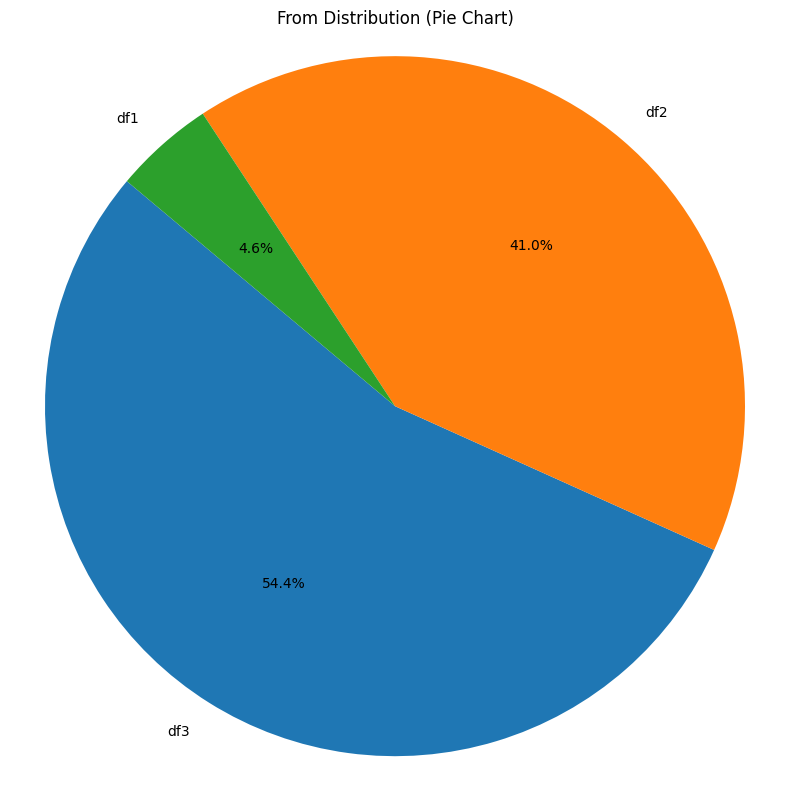

In [ ]:
status_counts = df['from'].value_counts()

plt.figure(figsize=(8, 8))

plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)

plt.title("From Distribution (Pie Chart)")
plt.axis('equal')
plt.tight_layout()
plt.show()

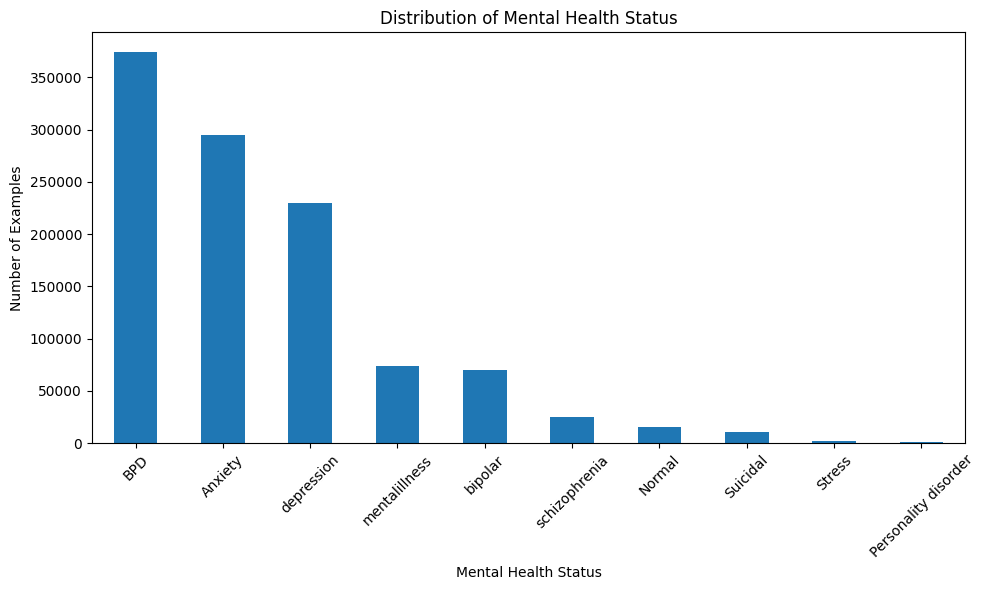

In [ ]:
status_counts = df['status'].value_counts()
plt.figure(figsize=(10, 6))

status_counts.plot(kind='bar')

plt.title("Distribution of Mental Health Status")
plt.xlabel("Mental Health Status")
plt.ylabel("Number of Examples")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df1 = df[df['from']=='df1']
df2 = df[df['from']=='df2']
df3 = df[df['from']=='df3']

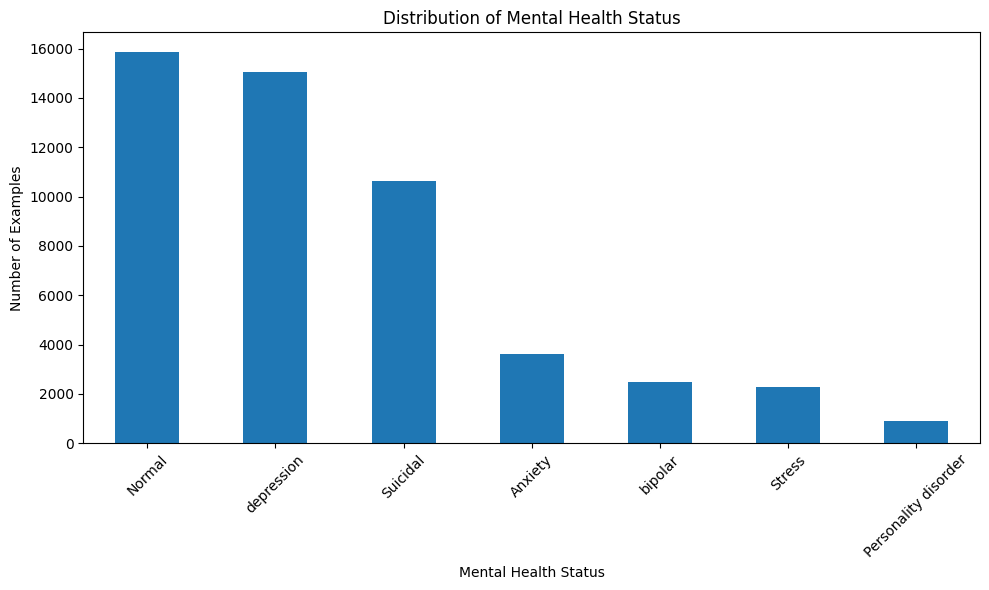

In [ ]:
status_counts = df1['status'].value_counts()
plt.figure(figsize=(10, 6))

status_counts.plot(kind='bar')

plt.title("Distribution of Mental Health Status")
plt.xlabel("Mental Health Status")
plt.ylabel("Number of Examples")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

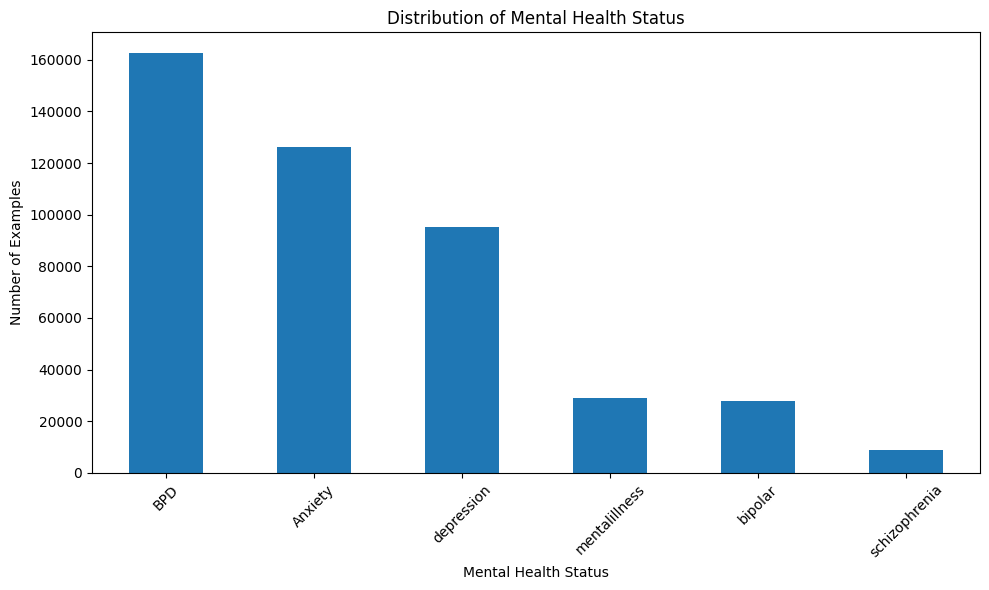

In [ ]:
status_counts = df2['status'].value_counts()
plt.figure(figsize=(10, 6))

status_counts.plot(kind='bar')

plt.title("Distribution of Mental Health Status")
plt.xlabel("Mental Health Status")
plt.ylabel("Number of Examples")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

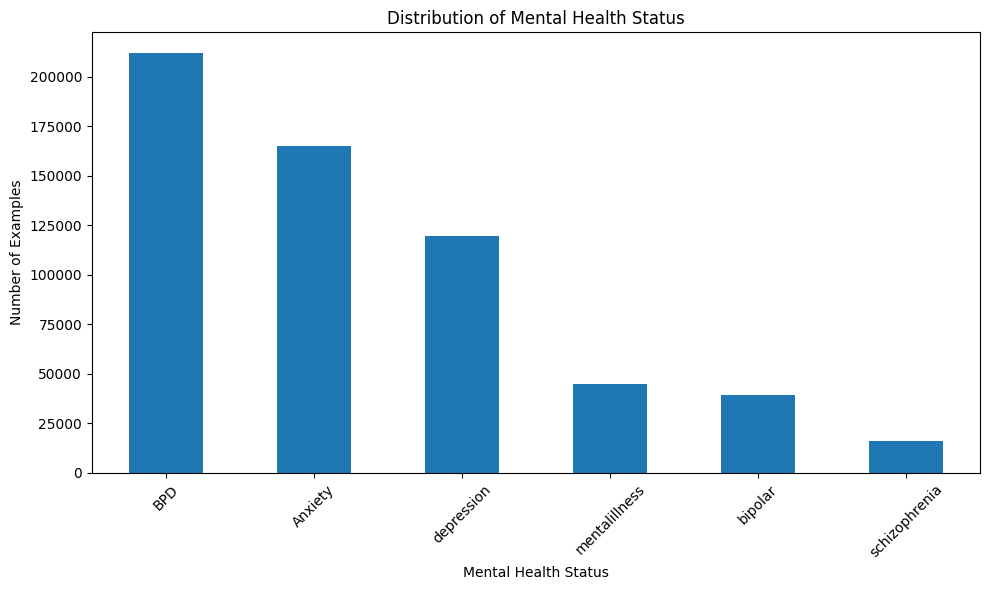

In [ ]:
status_counts = df3['status'].value_counts()
plt.figure(figsize=(10, 6))

status_counts.plot(kind='bar')

plt.title("Distribution of Mental Health Status")
plt.xlabel("Mental Health Status")
plt.ylabel("Number of Examples")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df['text'] = df['clean_text']
df.drop(columns=['clean_text'], inplace=True)
df

,text,status,from
0,oh my gosh,Anxiety,df1
1,trouble sleeping confused mind restless heart ...,Anxiety,df1
2,all wrong back off dear forward doubt stay in ...,Anxiety,df1
3,i have shifted my focus to something else but ...,Anxiety,df1
4,i am restless and restless it is been a month ...,Anxiety,df1
...,...,...,...
1123253,where can you go to get help for someone menta...,mentalillness,df3
1123254,i am rooster illusion ama,mentalillness,df3
1123255,i look again to make sure so one is near me an...,mentalillness,df3
1123256,nami peertopeer is a unique experiential learn...,mentalillness,df3


In [ ]:
df.to_csv('data/dataset.csv')

In [ ]:
df.to_csv('drive/MyDrive/dataset.csv')